# Scikit-Learn - Estimator API

We discuss Estimator API (application programming interface). 

Let us begin by understanding what is an Estimator API.

## What is Estimator API

It is one of the main APIs implemented by Scikit-learn. 

It provides a consistent interface for a wide range of ML applications that’s why all machine learning algorithms in Scikit-Learn are implemented via Estimator API. 

The object that learns from the data (fitting the data) is an estimator. 

It can be used with any of the algorithms like classification, regression, clustering or even with a transformer, that extracts useful features from raw data.

For fitting the data, all estimator objects expose a fit method that takes a dataset shown as follows −

    estimator.fit(data)

Next, all the parameters of an estimator can be set, as follows, when it is instantiated by the corresponding attribute.

    estimator = Estimator (param1=1, param2=2)
    estimator.param1

The output of the above would be 1.

Once data is fitted with an estimator, parameters are estimated from the data at hand. Now, all the estimated parameters will be the attributes of the estimator object ending by an underscore as follows −

    estimator.estimated_param_

# Use of Estimator API

Main uses of estimators are as follows −

## Estimation and decoding of a model

Estimator object is used for estimation and decoding of a model. 

Furthermore, the model is estimated as a deterministic function of the following −

- The parameters which are provided in object construction.

- The global random state (numpy.random) if the estimator’s random_state parameter is set to none.

- Any data passed to the most recent call to fit, fit_transform, or fit_predict.

- Any data passed in a sequence of calls to partial_fit.

## Mapping Non-Rectangular Data Representation into Rectangular Data

It maps a non-rectangular data representation into rectangular data. 

In simple words, it takes input where each sample is not represented as an array-like object of fixed length, and producing an array-like object of features for each sample.

## Distinction between core and outlying samples

It models the distinction between core and outlying samples by using following methods −

- fit

- fit_predict if transductive

- predict if inductive

## Guiding Principles

While designing the Scikit-Learn API, following guiding principles kept in mind −

### Consistency

This principle states that all the objects should share a common interface drawn from a limited set of methods. 

The documentation should also be consistent.

### Limited object hierarchy

This guiding principle says −

- Algorithms should be represented by Python classes

- Datasets should be represented in standard format like NumPy arrays, Pandas DataFrames, SciPy sparse matrix.

- Parameters names should use standard Python strings.

### Composition

As we know that, ML algorithms can be expressed as the sequence of many fundamental algorithms. Scikit-learn makes use of these fundamental algorithms whenever needed.

Sensible defaults
According to this principle, the Scikit-learn library defines an appropriate default value whenever ML models require user-specified parameters.

### Inspection

As per this guiding principle, every specified parameter value is exposed as pubic attributes.

## Steps in using Estimator API

Followings are the steps in using the Scikit-Learn estimator API −

### Step 1: Choose a class of model

In this first step, we need to choose a class of model. 
It can be done by importing the appropriate Estimator class from Scikit-learn.

### Step 2: Choose model hyperparameters

In this step, we need to choose class model hyperparameters. It can be done by instantiating the class with desired values.

### Step 3: Arranging the data

Next, we need to arrange the data into features matrix (X) and target vector(y).

### Step 4: Model Fitting

Now, we need to fit the model to your data. It can be done by calling fit() method of the model instance.

### Step 5: Applying the model

After fitting the model, we can apply it to new data. For supervised learning, use predict() method to predict the labels for unknown data. While for unsupervised learning, use predict() or transform() to infer properties of the data.

# Supervised Learning

Supervise Learning split the dataset into training, test, and k-fold validation.

Below is a simplified example for linear regression.

Here, as an example of this process we are taking common case of fitting a line to (x,y) data, i.e., simple linear regression.

First, we need to load the dataset, we are using iris dataset −

### Example

X_iris.shape: (150, 4)
y_iris.shape: (150,)


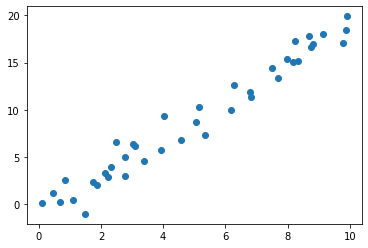

In [1]:
import seaborn as sns
iris = sns.load_dataset('iris')
X_iris = iris.drop('species', axis = 1)
print('X_iris.shape:', X_iris.shape)
y_iris = iris['species']
print('y_iris.shape:', y_iris.shape)
import matplotlib.pyplot as plt
import numpy as np
rng = np.random.RandomState(35)
x = 10*rng.rand(40)
y = 2*x-1+rng.randn(40)
plt.scatter(x,y);

So, we have the above data for our linear regression example.

Now, with this data, we can apply the above-mentioned steps.

## Choose a class of model

Here, to compute a simple linear regression model, we need to import the linear regression class as follows −

    from sklearn.linear_model import LinearRegression

## Choose model hyperparameters

Once we choose a class of model, we need to make some important choices which are often represented as hyperparameters, or the parameters that must set before the model is fit to data. 

Here, for this example of linear regression, we would like to fit the intercept by using the fit_intercept hyperparameter.

## Arranging the data

Now, as we know that our target variable y is in correct form, i.e., a length n_samples array of 1-D. 

But, we need to reshape the feature matrix X to make it a matrix of size [n_samples, n_features]. 

### Model fitting

Once, we arrange the data, it is time to fit the model, i.e., to apply our model to data. 

This can be done with the help of fit() method.

In Scikit-learn, the fit() process have some trailing underscores.

For this example, the below parameter shows the slope of the simple linear fit of the data 

### Applying the model to new data

After training the model, we can apply it to new data. 

As the main task of supervised machine learning is to evaluate the model based on new data that is not the part of the training set. 

It can be done with the help of predict() method as follows


### Example

model:
 LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

X.shape:
 (40, 1)

model.coef_:
 [1.99839352]

model.intercept_:
 -0.9895459457775022



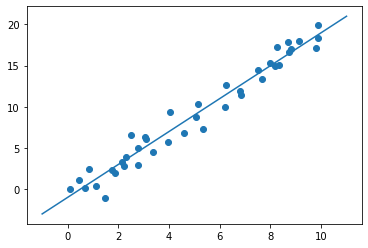

In [9]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# Generate the data
rng = np.random.RandomState(35)
x = 10*rng.rand(40)
y = 2*x-1+rng.randn(40)
#plt.scatter(x,y);

# Choose a class of model
from sklearn.linear_model import LinearRegression

# Choose model hyperparameters
model = LinearRegression(fit_intercept=True)
print('model:\n', model)
print()
X = x[:, np.newaxis]
print('X.shape:\n', X.shape)
print()

model.fit(X, y)
print('model.coef_:\n', model.coef_)
print()
print('model.intercept_:\n', model.intercept_)
print()

xfit = np.linspace(-1, 11)
Xfit = xfit[:, np.newaxis]
yfit = model.predict(Xfit)
plt.scatter(x, y)
plt.plot(xfit, yfit)
plt.show()

# Unsupervised Learning Example

Here, as an example of this process we are taking common case of reducing the dimensionality of the Iris dataset so that we can visualize it more easily. For this example, we are going to use principal component analysis (PCA), a fast-linear dimensionality reduction technique.

Like the above given example, we can load and plot the random data from iris dataset. 

After that we can follow the steps as below

## Choose a class of model

    from sklearn.decomposition import PCA

## Choose model hyperparameters

    model = PCA(n_components=2)

## Model fitting

    model.fit(X_iris)

## Transform the data to two-dimensional

    X_2D = model.transform(X_iris)
    
    iris['PCA1'] = X_2D[:, 0]
    
    iris['PCA2'] = X_2D[:, 1]

X_iris.shape:
 (150, 4)

y_iris.shape
 (150,)

model: PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)



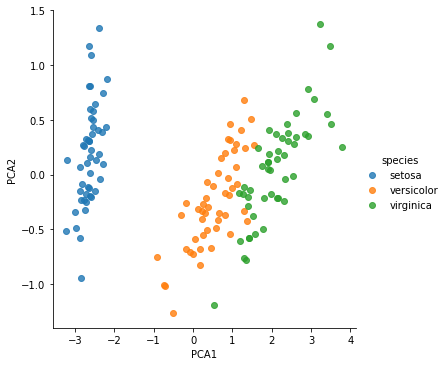

In [22]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

iris = sns.load_dataset('iris')
X_iris = iris.drop('species', axis = 1)
print('X_iris.shape:\n', X_iris.shape)
print()
y_iris = iris['species']
print('y_iris.shape\n', y_iris.shape)
print()

# Choose a class of model
from sklearn.decomposition import PCA

# Choose model hyperparameters
model = PCA(n_components=2)
print('model:', model)
print()

# Model fitting.
model.fit(X_iris)
# Trasform the data into two-dimensional
X_2D = model.transform(X_iris)
# Index the output data
iris['PCA1'] = X_2D[:, 0]
iris['PCA2'] = X_2D[:, 1]
sns.lmplot(x="PCA1", y="PCA2", hue='species', data=iris, fit_reg=False)
import matplotlib.pyplot as plt
plt.show()